In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def histogram(img):    
    if len(np.shape(img))==3:
        x_axis = np.arange(256)

        histImgR = np.histogram(img[:,:,0],256)[0]
        histImgG = np.histogram(img[:,:,1],256)[0]
        histImgB = np.histogram(img[:,:,2],256)[0]

        plt.figure(1,[15,15])
        plt.subplot(311)
        plt.bar(x_axis,histImgR, color = "red")
        plt.title("Histograma da matriz R")

        plt.subplot(312)
        plt.bar(x_axis,histImgG, color = "green")
        plt.title("Histograma da matriz G")

        plt.subplot(313)
        plt.bar(x_axis,histImgB, color = "blue")
        plt.title("Histograma da matriz B")
    else:
        x_axis = np.arange(256)

        hist = np.histogram(img,256)[0]

        plt.figure(1,[15,5])
        plt.bar(x_axis,hist)
        plt.title("Histograma da imagem")

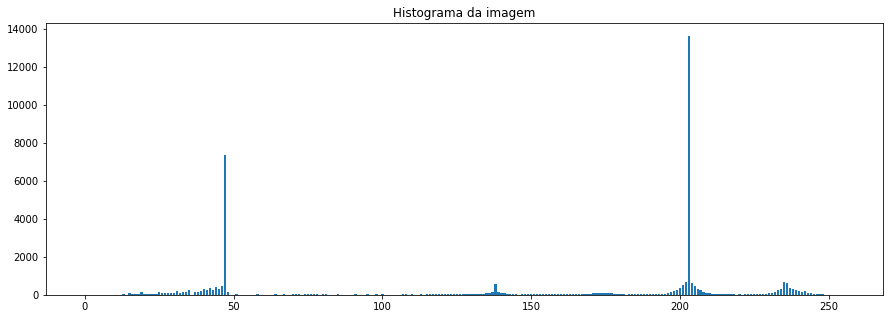

In [3]:
img = cv2.imread(".\\images\\saitama.jpg",0)
histogram(img)

In [7]:
def histogram(img):
    return np.histogram(img,256)[0]

def equalize(img): 
    L = 256
    npixels = np.shape(img)[0]*np.shape(img)[1]
    x_axis = np.arange(256)

    hist = histogram(img)
        
    hist_a = np.cumsum(hist)
        
    imout = np.copy(img)
    imout = (L * hist_a[img] / np.max(hist_a)).astype(np.uint8)
    
    equa = np.zeros(len(hist))
    for i in range(len(hist)):
        equa[i] = L * hist_a[i]/npixels
    
    plt.figure(1,[15,5])
    plt.subplot(211)
    plt.bar(x_axis,hist)
    plt.title("Histograma original")
    
    plt.subplot(212)
    plt.bar(x_axis,histogram(imout))
    plt.title("Histograma equalizado")
    
    return imout


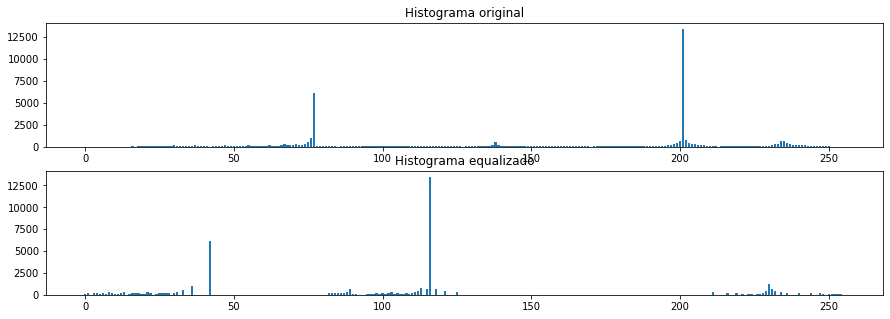

In [9]:
img = cv2.imread(".\\images\\saitama.png",0)
imout = equalize(img)

(-0.5, 199.5, 199.5, -0.5)

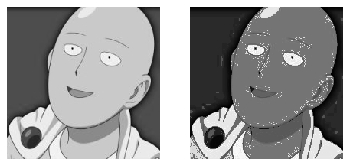

In [10]:
plt.figure(2)
plt.subplot(121)
plt.imshow(img,cmap="gray")
plt.axis("off")

plt.subplot(122)
plt.imshow(imout,cmap="gray")
plt.axis("off")

In [14]:
def motion_detector(img1,img2):
    hist1 = histogram(img1)
    hist2 = histogram(img2)
    
    dif = np.sum(np.abs(hist1-hist2))
    print(dif)
    if dif > 160000:
        print("Houve movimento")

In [1]:
captura = cv2.VideoCapture("http://192.168.0.39:4747/mjpegfeed")

cnt = 0


while(1):
    ret, frame = captura.read()
    
    if cnt == 0:
        img1 = frame[:,:,0]
    if cnt == 60:
        cnt = 0
        img2 = frame[:,:,0]
        motion_detector(img1,img2)
    cnt+=1
    
    cv2.imshow("Video", frame[:,:,0])
    #cv2.imshow("Video", frame[:,:,0])
   
    
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break
 
captura.release()
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined